In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

/home/tking/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import cv2

In [3]:
from scipy.misc import imresize

In [4]:
# Original
#original = cv2.imread('woman.jpg',1)
#original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

In [5]:
# Get images
#image = img_to_array(load_img('woman.jpg'))
#image = np.array(image, dtype=float)

In [6]:
#X = rgb2lab(1.0/255*image)[:,:,0]
#Y = rgb2lab(1.0/255*image)[:,:,1:]
#Y /= 128
#X = X.reshape(1, 400, 400, 1)
#Y = Y.reshape(1, 400, 400, 2) 

In [7]:
# multiple img
Xs=[]
Ys=[]
num=100
#for i in range(num):
    #fn = '{0:s}/{1:s}/{1:s}_{2:04d}.jpg'.format('train','person', i)
directory='../images/plant/'
for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        if os.path.exists(filename):
        # print(os.path.join(directory, filename))
        
            image = img_to_array(load_img(filename))
            image = np.array(image, dtype=float)
            X = rgb2lab(1.0/255*image)[:,:,0]
            Y = rgb2lab(1.0/255*image)[:,:,1:]
            Y /= 128
            X = X.reshape(1, 400, 400, 1)
            Y = Y.reshape(1, 400, 400, 2)
            Xs.append(X)
            Ys.append(Y)
Xs=np.array(Xs)
Ys=np.array(Ys)

X=np.reshape(Xs, (num, 400, 400, 1))
Y=np.reshape(Ys, (num, 400, 400, 2))
    

ValueError: cannot reshape array of size 0 into shape (100,400,400,1)

In [25]:
# Building the neural network 九层神经网络 跑一次就行了
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [26]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [27]:
# 5 mins 823pm-31; 209-
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=100, callbacks=[EarlyStopping(patience=5)])


Epoch 1/100
20/20 [==============================] - 9s - loss: 0.0354     
Epoch 2/100
20/20 [==============================] - 9s - loss: 0.0089     
Epoch 3/100
20/20 [==============================] - 9s - loss: 0.0087     
Epoch 4/100
20/20 [==============================] - 8s - loss: 0.0087     
Epoch 5/100
20/20 [==============================] - 9s - loss: 0.0086     
Epoch 6/100
20/20 [==============================] - 8s - loss: 0.0085     
Epoch 7/100
20/20 [==============================] - 8s - loss: 0.0084     
Epoch 8/100
20/20 [==============================] - 10s - loss: 0.0083    
Epoch 9/100
20/20 [==============================] - 10s - loss: 0.0083    
Epoch 10/100
20/20 [==============================] - 10s - loss: 0.0084    
Epoch 11/100
20/20 [==============================] - 10s - loss: 0.0082    
Epoch 12/100
20/20 [==============================] - 10s - loss: 0.0103    
Epoch 13/100
20/20 [==============================] - 9s - loss: 0.0081     
Epoch 14

In [28]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [11]:
from keras.models import model_from_json

In [29]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [30]:
imagetest = img_to_array(load_img('heibaiyinghua.jpeg'))
imagetest=imresize(imagetest, (400, 400, 3))
imagetest = np.array(imagetest, dtype=float)
Xtest = rgb2lab(1.0/255*imagetest)[:,:,0]
Ytest = rgb2lab(1.0/255*imagetest)[:,:,1:]
Ytest /= 128
Xtest = Xtest.reshape(1, 400, 400, 1)
Ytest = Ytest.reshape(1, 400, 400, 2) 

In [31]:

#print(model.evaluate(Xtest, Ytest, batch_size=1))
output = loaded_model.predict(Xtest)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = Xtest[0][:,:,0]
cur[:,:,1:] = output[0]
#imsave("img_result.png", lab2rgb(cur))
#imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))


In [8]:
import matplotlib.pyplot as plt

In [9]:
plt.imshow(lab2rgb(cur))
plt.title('Resulting Colorized Image')
plt.show()

plt.imshow(imagetest)
plt.title('Original Image')
plt.show()

plt.imshow(rgb2gray(lab2rgb(cur)), cmap=plt.cm.gray)
plt.title('Resulting Greyscale Image')
plt.show()

NameError: name 'cur' is not defined

In [23]:
X.shape

(5, 400, 400, 1)

In [21]:
np.shape(Xtest)

(1, 400, 400, 1)

In [16]:
## 
import glob

In [17]:
directory='../images/plant/'
for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        if os.path.exists(filename):
            print(filename)

253.92395187165775
73.23586991869918
253.92395187165775
253.92395187165775
253.92395187165775
253.92395187165775
253.92395187165775
253.92395187165775
139.32423644444444
83.98314759535656
113.58683031869079
122.65423423423424
91.00070249813209
253.92395187165775
117.19157155555556


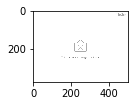

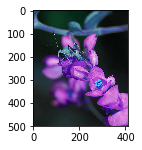

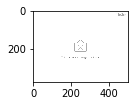

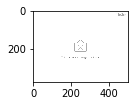

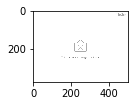

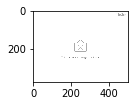

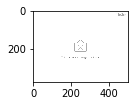

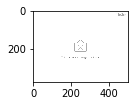

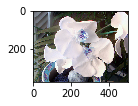

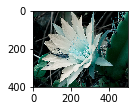

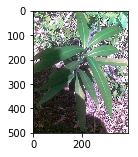

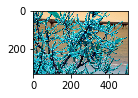

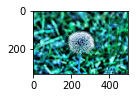

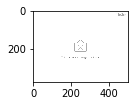

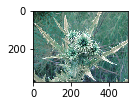

In [30]:
cnt=0
for fn in glob.glob(r"../images/plant/*.jpg"):
    if os.path.exists(fn) and cnt <15:
        #image = img_to_array(load_img(fn))
        image=cv2.imread(fn)
        plt.figure(figsize=(20,20))
        plt.subplot(2,10,cnt+1)
        #image = np.array(image)#, dtype=float)
        plt.imshow(image)
        print(np.mean(image))
        cnt+=1

In [40]:
Image_plant=[]
for fn in glob.glob(r"../images/plant/*.jpg"):
    image=cv2.imread(fn)
    if not image is None and np.mean(image)<250:
        #img = image.resize((400, 400,3)) 
        Image_plant.append(image)

/home/tking/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


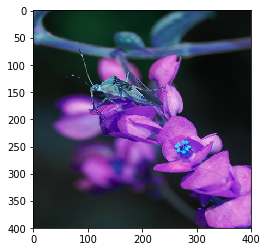

In [58]:
p=np.copy(Image_plant[0])
from skimage import transform,data
pl=transform.resize(p, (400, 400))
plt.figure()
plt.imshow(pl)

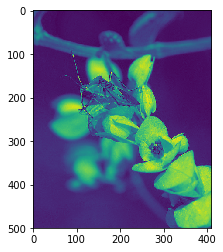

In [61]:
plt.figure()
plt.imshow(p[:,:,0])